# テキストデータの読み込み

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
df = pd.read_csv('test.csv') #csvファイルを読み込み
df

,a,b,c,d
0,1,2,3,4
1,5,6,7,8


In [3]:
df.to_csv('test2.csv') #csvに保存

# JSON

In [5]:
obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [6]:
import json
data = json.loads(obj) #jsonからオブジェクトを作成
data

{'clothes': None,
 'diet': [{'food': 'grass', 'fur': 'Brown', 'zoo_animal': 'Gazelle'}],
 'food': ['Meat', 'Veggies', 'Honey'],
 'fur': 'Golden',
 'zoo_animal': 'Lion'}

In [7]:
json.dumps(data) #PythonオブジェクトからJSONに変換

'{"zoo_animal": "Lion", "food": ["Meat", "Veggies", "Honey"], "fur": "Golden", "clothes": null, "diet": [{"zoo_animal": "Gazelle", "food": "grass", "fur": "Brown"}]}'

※excelやHTMLからも読み込み可能

# データのマージ

In [12]:
df1 = DataFrame({'key':['X','Z','Y','Z','X','X'],'data_set_1': np.arange(6)})
df1

,data_set_1,key
0,0,X
1,1,Z
2,2,Y
3,3,Z
4,4,X
5,5,X


In [13]:
df2 = DataFrame({'key':['Q','Y','Z'],'data_set_2':[1,2,3]})
df2

,data_set_2,key
0,1,Q
1,2,Y
2,3,Z


In [14]:
pd.merge(df1,df2) #同じ列(key)でマージされる(内部結合)

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2


In [15]:
pd.merge(df1,df2,on='key',how='left') #左外部結合

,data_set_1,key,data_set_2
0,0,X,NaN
1,1,Z,3.0
2,2,Y,2.0
3,3,Z,3.0
4,4,X,NaN
5,5,X,NaN


In [16]:
pd.merge(df1,df2,on='key',how='outer') #外部結合

,data_set_1,key,data_set_2
0,0.0,X,NaN
1,4.0,X,NaN
2,5.0,X,NaN
3,1.0,Z,3.0
4,3.0,Z,3.0
5,2.0,Y,2.0
6,NaN,Q,1.0


# データの連結
##### Arrayの場合

In [17]:
arr1 = np.arange(9).reshape((3,3))
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
np.concatenate([arr1,arr1],axis=1) #列方向に連結

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [19]:
np.concatenate([arr1,arr1],axis=0) #行方向に連結

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

##### Seriesの場合

In [20]:
ser1 =  Series([0,1,2],index=['T','U','V'])
ser2 = Series([3,4],index=['X','Y'])
pd.concat([ser1,ser2,ser1]) #結合

T    0
U    1
V    2
X    3
Y    4
T    0
U    1
V    2
dtype: int64

In [21]:
pd.concat([ser1,ser2],axis=1) #列方向にするとDataFrameに

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


##### DataFrameの場合

In [23]:
df1 = DataFrame(np.random.randn(4,3), columns=['X', 'Y', 'Z'])
df2 = DataFrame(np.random.randn(3, 3), columns=['Y', 'Q', 'X'])

In [24]:
df1

,X,Y,Z
0,1.040427,0.486087,0.048631
1,-1.051764,-1.311897,-1.059046
2,-0.575235,-0.345289,0.776589
3,-0.375862,0.246895,0.125457


In [25]:
df2

,Y,Q,X
0,-0.155810,-0.030156,0.799588
1,-0.211765,-1.983837,-0.747907
2,-0.312857,-0.139979,1.389840


In [28]:
pd.concat([df1,df2]) #行方向に連結

,Q,X,Y,Z
0,NaN,1.040427,0.486087,0.048631
1,NaN,-1.051764,-1.311897,-1.059046
2,NaN,-0.575235,-0.345289,0.776589
3,NaN,-0.375862,0.246895,0.125457
0,-0.030156,0.799588,-0.155810,NaN
1,-1.983837,-0.747907,-0.211765,NaN
2,-0.139979,1.389840,-0.312857,NaN


# DataFrameの組み合わせ（存在するデータを使用する）

In [30]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [32]:
ser1 = Series([2,np.nan,4,np.nan,6,np.nan],
           index=['Q','R','S','T','U','V'])

# 長さを同じにします。
ser2 = Series(np.arange(len(ser1), dtype=np.float64),
           index=['Q','R','S','T','U','V'])

In [33]:
ser1

Q    2.0
R    NaN
S    4.0
T    NaN
U    6.0
V    NaN
dtype: float64

In [34]:
ser2

Q    0.0
R    1.0
S    2.0
T    3.0
U    4.0
V    5.0
dtype: float64

In [35]:
ser1.combine_first(ser2) #ser1がNaNであればser2を使う

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

# SeriesとDataFrameの変換

In [37]:
df1 = DataFrame(np.arange(8).reshape((2, 4)),
                 index=pd.Index(['LA', 'SF'], name='city'),
                 columns=pd.Index(['A', 'B', 'C','D'], name='letter'))
df1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [39]:
st = df1.stack() #Seriesに変換
st

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int32

In [40]:
st.unstack() #DataFrameに戻す

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [42]:
st.unstack('city') #列名を指定できる

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


# ピポットテーブル

In [43]:
import pandas.util.testing as tm
tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return DataFrame(data, columns=['date', 'variable', 'value'])
dframe = unpivot(tm.makeTimeDataFrame())

In [45]:
dframe

,date,variable,value
0,2000-01-03,A,1.287168
1,2000-01-04,A,-0.566630
2,2000-01-05,A,0.263044
3,2000-01-03,B,-0.290526
4,2000-01-04,B,-1.728453
5,2000-01-05,B,0.004109
6,2000-01-03,C,1.801619
7,2000-01-04,C,0.004180
8,2000-01-05,C,-0.071737
9,2000-01-03,D,0.404888


In [46]:
#index、列名、値の順番で指定
dframe_piv = dframe.pivot('date','variable','value')
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,1.287168,-0.290526,1.801619,0.404888
2000-01-04,-0.566630,-1.728453,0.004180,0.450508
2000-01-05,0.263044,0.004109,-0.071737,0.304238


# 重複データの処理

In [47]:
df = DataFrame({'key1': ['A'] * 2 + ['B'] * 3,
                  'key2': [2, 2, 2, 3, 3]})
df

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [49]:
df.duplicated() #重複データを確認

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [51]:
df.drop_duplicates() #重複データを削除

,key1,key2
0,A,2
2,B,2
3,B,3


# マッピングでの列の追加

In [53]:
dframe = DataFrame({'city':['Alma','Brian Head','Fox Park'],
                    'altitude':[3158,3000,2762]})
dframe

,altitude,city
0,3158,Alma
1,3000,Brian Head
2,2762,Fox Park


In [54]:
mp={'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'}
#指定の列と一致した行にstateを追加する
dframe['state'] = dframe['city'].map(mp)

In [56]:
dframe

,altitude,city,state
0,3158,Alma,Colorado
1,3000,Brian Head,Utah
2,2762,Fox Park,Wyoming


# 置換


In [57]:
ser1 = Series([1,2,3,4,1,2,3,4])
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [58]:
ser1.replace(1,np.nan) #1をNaNに置換

0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
5    2.0
6    3.0
7    4.0
dtype: float64

In [59]:
ser1.replace([1,4],[100,400]) #複数指定も可

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

# Permutation

In [62]:
df = DataFrame(np.arange(4 * 4).reshape((4, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [63]:
blender = np.random.permutation(4) #バラバラのarrが取得できる
blender

array([3, 0, 2, 1])

In [65]:
df.take(blender) #これを使ってindexを変更できる

,0,1,2,3
3,12,13,14,15
0,0,1,2,3
2,8,9,10,11
1,4,5,6,7


# groupby

In [67]:
df = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})
df

,dataset1,dataset2,k1,k2
0,-0.954883,-0.049563,X,alpha
1,-0.250300,0.028360,X,beta
2,-1.707754,0.304103,Y,alpha
3,-0.258510,-1.641336,Y,beta
4,0.064366,2.549679,Z,alpha


In [68]:
#k1でグループしたdataset1を取得
group1 = dframe['dataset1'].groupby(df['k1'])
group1

In [70]:
group1.mean() #グループごとの平均値

k1
X    0.215198
Y    0.578671
Z   -0.207258
Name: dataset1, dtype: float64

##### シンプルな書き方

In [71]:
df.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.602592,-0.010601
Y,-0.983132,-0.668617
Z,0.064366,2.549679


##### 件数を取得

In [72]:
df.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

##### 繰り返し処理

In [73]:
#nameは要素、groupは値自体
for name,group in df.groupby('k1'):
    print('This is the {} group'.format(name))
    print(group)
    print('\n')

This is the X group
   dataset1  dataset2 k1     k2
0 -0.954883 -0.049563  X  alpha
1 -0.250300  0.028360  X   beta


This is the Y group
   dataset1  dataset2 k1     k2
2 -1.707754  0.304103  Y  alpha
3 -0.258510 -1.641336  Y   beta


This is the Z group
   dataset1  dataset2 k1     k2
4  0.064366  2.549679  Z  alpha




##### 特定のgroupだけ

In [74]:
#k1でグループしてxだけを出力
gr = df.groupby('k1')
gr.get_group('X')

,dataset1,dataset2,k1,k2
0,-0.954883,-0.049563,X,alpha
1,-0.250300,0.028360,X,beta


##### 辞書型でグループ化

In [75]:
animals = DataFrame(np.arange(16).reshape(4, 4),
                   columns=['W', 'X', 'Y', 'Z'],
                   index=['Dog', 'Cat', 'Bird', 'Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [79]:
animals.ix[1:2, ['W', 'Y']] = np.nan 
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [80]:
mp = {'W': 'bad', 'X': 'good', 'Y': 'bad','Z': 'good'}
mp

{'W': 'bad', 'X': 'good', 'Y': 'bad', 'Z': 'good'}

In [83]:
#WとY、XとZがグループされる
animals2 = animals.groupby(mp, axis=1)
animals2.sum()

,bad,good
Dog,2.0,4.0
Cat,NaN,12.0
Bird,18.0,20.0
Mouse,26.0,28.0


##### Seriesでグループ化

In [84]:
s1 = Series(mp)
s1

W     bad
X    good
Y     bad
Z    good
dtype: object

In [85]:
animals.groupby(s1,axis=1).count() #やり方は辞書型と同じ

,bad,good
Dog,2,2
Cat,0,2
Bird,2,2
Mouse,2,2


##### 関数

In [86]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [87]:
animals.groupby(len).sum() #indexの文字数でグループ

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


# Aggregation

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
#サンプルデータを以下からダウンロード
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [3]:
df = pd.read_csv('winequality-red.csv',sep=';') #データの読み込み
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['alcohol'].mean() #アルコール度数の平均

10.422983114446502

In [6]:
# 関数を定義
def max_to_min(arr):
    return arr.max() - arr.min()

In [8]:
wino = df.groupby('quality') #qualityでグループ化
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [9]:
wino.agg(max_to_min) #アグリゲーションに関数を渡す（関数で計算した結果が渡ってくる）

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [10]:
wino.agg('mean') #文字列も渡せる

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


##### ピボット

In [13]:
# 新しい列を付け加えます。
df['qual/alc ratio'] = df['quality']/df['alcohol']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [14]:
df.pivot_table(index=['quality']) #groupbyの代わりにPivotを使用

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


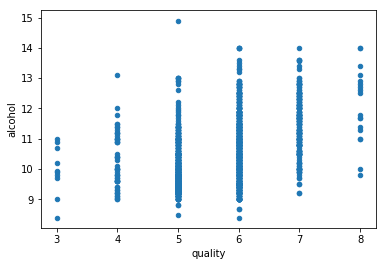

In [15]:
%matplotlib inline
df.plot(kind='scatter',x='quality',y='alcohol') #散布図、Xに品質、Yにアルコール度数

# Split, Apply, Combine
##### Split…複数のデータの固まりに分割
##### Apply…平均等を適用する
##### Combine…１つのデータにまとめる

In [16]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# 列を追加する関数
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [20]:
df.sort_values('alcohol',ascending=False,inplace=True) # アルコール度数で並べ替え　
df = df.groupby('quality').apply(ranker)# groupbyのあと、先ほどの関数を適用

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3


In [22]:
num = df['quality'].value_counts() # qualityごとの本数を計算
num

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [23]:
# それぞれのランクから、一番アルコール度数が高いワインを抽出
df[df.alc_content_rank == 1].sort_values('quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1


# クロス集計

In [24]:
from io import StringIO #文字列をファイルのように扱う
#複数行にわたるときは"""でかこむ
data ="""Sample  Animal   Intelligence
1   Dog   Dumb
2 Dog Dumb
3   Cat Smart
4 Cat    Smart
5 Dog Smart
6 Cat Smart"""
df = pd.read_table(StringIO(data),sep='\s+')
df

,Sample,Animal,Intelligence
0,1,Dog,Dumb
1,2,Dog,Dumb
2,3,Cat,Smart
3,4,Cat,Smart
4,5,Dog,Smart
5,6,Cat,Smart


In [25]:
pd.crosstab(df.Animal,df.Intelligence,margins=True) # クロス集計表

Intelligence,Dumb,Smart,All
Animal,,,
Cat,0,3,3
Dog,2,1,3
All,2,4,6
